# **Deep Neural Network**
### **Addressing Bias and Fairness Issues in ML Models**
### Sensitive Attribute = Age
#### Dataset: *German Credit Data* https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
#### Problem: **Classification**

#### Elaborated By:
**Juan David Arroyave Ramirez**

In [102]:
##@Copyright 2025 Juan Arroyave

#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at

#   http://www.apache.org/licenses/LICENSE-2.0

#Unless required by applicable law or agreed to in writing, software distributed
#under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR
#CONDITIONS OF ANY KIND, either express or implied. See the License for the
#specific language governing permissions and limitations under the License.

## **Description of the German credit dataset.**

1. Title: German Credit data

2. Source Information

  Professor Dr. Hans Hofmann  
  Institut f"ur Statistik und "Okonometrie  
  Universit"at Hamburg  
  FB Wirtschaftswissenschaften  
  Von-Melle-Park 5    
  2000 Hamburg 13

3. Number of Instances:  **1000**

  Two datasets are provided.  the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and  is in the file "german.data".   

  For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric".  This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables. Several attributes that are ordered categorical (such as attribute 17) have been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)

   ### **For our scenario, we selected the numerical dataset because the data is already in int64 format, making it suitable for classification tasks without further preprocessing**

### **Installing library packages with compatible dependencies**

In [ ]:
!pip install \
  tensorflow==2.15 \
  tensorflow-model-remediation \
  fairness-indicators==0.46.0 \
  tensorflow-model-analysis==0.46.0 \
  tensorflow-data-validation==1.15.1

In [ ]:
!pip install facets-overview==1.1.1

### **Importing libraries**

In [167]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Scikit-Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier

#Google/TensorFlow libraries
import tensorflow as tf
import tensorflow_model_analysis as tfma
from google.protobuf import text_format
from tensorflow_model_remediation import min_diff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import widgets
from IPython.core.display import display, HTML
import base64
from base64 import b64encode
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

# Adjusting the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


# EXPLORATORY DATA ANALYSIS (**EDA**)

In [168]:
df = pd.read_csv('/german.data-numeric.csv', header=None)
print(df)

     0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0     1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1     2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2     4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3     1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4     1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
995   4  12   2  17   1   4   2   4   1  31  ...   0   0   1   0   0   1   0   
996   1  30   2  39   1   3   1   4   2  40  ...   0   1   1   0   0   1   0   
997   4  12   2   8   1   5   3   4   3  38  ...   0   0   1   0   0   1   0   
998   1  45   2  18   1   3   3   4   4  23  ...   0   0   1   0   0   0   0   
999   2  45   4  46   2   1   3   4   3  27  ...   0   1   1   0   0   1   0   

     22  23  24  
0     0   1   1  
1  

In [169]:
df = df.dropna(axis=1, how='all') #removing empty columns

According to the German Credit Dataset, the features in columns correspond to qualitative and numerical attributes explained as it follows:



In [170]:
df.columns = [
    "Checking_account_status",  # Column 01
    "Loan_duration_months",     # Column 02
    "Credit_history",           # Column 03
    "Credit_amount",            # Column 04
    "Savings_bonds",            # Column 05
    "Employment_since",         # Column 06
    "Loan_purpose",             # Column 07
    "Installment_rate_pct",     # Column 08
    "Personal_status_sex",      # Column 09
    "Age",                      # Column 10
    "Residence_since",          # Column 11
    "Property_type",            # Column 12
    "Other_debtors",            # Column 13
    "Other_installment_plans",  # Column 14
    "Housing_type",             # Column 15
    "Existing_credits",         # Column 16
    "Job_type",                 # Column 17
    "Dependents",               # Column 18
    "Telephone",                # Column 19
    "Foreign_worker",           # Column 20
    "Unknown_1",                # Column 21 (Encoded column)
    "Unknown_2",                # Column 22 (Encoded column)
    "Unknown_3",                # Column 23 (Encoded column)
    "Unknown_4",                # Column 24 (Encoded column)
    "Target"                    # (Good = 1, Bad = 2) # Column 25
]

In [171]:
print(df.columns)


Index(['Checking_account_status', 'Loan_duration_months', 'Credit_history',
       'Credit_amount', 'Savings_bonds', 'Employment_since', 'Loan_purpose',
       'Installment_rate_pct', 'Personal_status_sex', 'Age', 'Residence_since',
       'Property_type', 'Other_debtors', 'Other_installment_plans',
       'Housing_type', 'Existing_credits', 'Job_type', 'Dependents',
       'Telephone', 'Foreign_worker', 'Unknown_1', 'Unknown_2', 'Unknown_3',
       'Unknown_4', 'Target'],
      dtype='object')


In [172]:
print(df.dtypes)

Checking_account_status    int64
Loan_duration_months       int64
Credit_history             int64
Credit_amount              int64
Savings_bonds              int64
                           ...  
Unknown_1                  int64
Unknown_2                  int64
Unknown_3                  int64
Unknown_4                  int64
Target                     int64
Length: 25, dtype: object


In [173]:
print(df.isnull().sum())

Checking_account_status    0
Loan_duration_months       0
Credit_history             0
Credit_amount              0
Savings_bonds              0
                          ..
Unknown_1                  0
Unknown_2                  0
Unknown_3                  0
Unknown_4                  0
Target                     0
Length: 25, dtype: int64


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Checking_account_status  1000 non-null   int64
 1   Loan_duration_months     1000 non-null   int64
 2   Credit_history           1000 non-null   int64
 3   Credit_amount            1000 non-null   int64
 4   Savings_bonds            1000 non-null   int64
 5   Employment_since         1000 non-null   int64
 6   Loan_purpose             1000 non-null   int64
 7   Installment_rate_pct     1000 non-null   int64
 8   Personal_status_sex      1000 non-null   int64
 9   Age                      1000 non-null   int64
 10  Residence_since          1000 non-null   int64
 11  Property_type            1000 non-null   int64
 12  Other_debtors            1000 non-null   int64
 13  Other_installment_plans  1000 non-null   int64
 14  Housing_type             1000 non-null   int64
 15  Exist

In [175]:
df.describe()

,Checking_account_status,Loan_duration_months,Credit_history,Credit_amount,Savings_bonds,Employment_since,Loan_purpose,Installment_rate_pct,Personal_status_sex,Age,...,Existing_credits,Job_type,Dependents,Telephone,Foreign_worker,Unknown_1,Unknown_2,Unknown_3,Unknown_4,Target
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,2.6,20.9,2.5,32.7,2.1,3.4,2.7,2.8,2.4,35.5,...,0.2,0.1,0.9,0.0,0.2,0.7,0.0,0.2,0.6,1.3
std,1.3,12.1,1.1,28.3,1.6,1.2,0.7,1.1,1.1,11.4,...,0.4,0.3,0.3,0.2,0.4,0.5,0.1,0.4,0.5,0.5
min,1.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,1.0,12.0,2.0,14.0,1.0,3.0,2.0,2.0,1.0,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,2.0,18.0,2.0,23.0,1.0,3.0,3.0,3.0,2.0,33.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
75%,4.0,24.0,4.0,40.0,3.0,5.0,3.0,4.0,3.0,42.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
max,4.0,72.0,4.0,184.0,5.0,5.0,4.0,4.0,4.0,75.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


In [176]:
df.head(5)

,Checking_account_status,Loan_duration_months,Credit_history,Credit_amount,Savings_bonds,Employment_since,Loan_purpose,Installment_rate_pct,Personal_status_sex,Age,...,Existing_credits,Job_type,Dependents,Telephone,Foreign_worker,Unknown_1,Unknown_2,Unknown_3,Unknown_4,Target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [177]:
df.tail(5)

,Checking_account_status,Loan_duration_months,Credit_history,Credit_amount,Savings_bonds,Employment_since,Loan_purpose,Installment_rate_pct,Personal_status_sex,Age,...,Existing_credits,Job_type,Dependents,Telephone,Foreign_worker,Unknown_1,Unknown_2,Unknown_3,Unknown_4,Target
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2
999,2,45,4,46,2,1,3,4,3,27,...,0,1,1,0,0,1,0,0,1,1


Target Values: (1=Good) (2=Bad)

In [178]:
Target = df.columns.values[-1]
print("{}: {} values, {}".format(Target, df[Target].nunique(), df[Target].unique()))

Target: 2 values, [1 2]


Target most significant values:

In [23]:
df[Target].value_counts()

,Target
1,700
2,300


**Dataset with 700 people with good credit score and 300 with low or bad credit.**

In [25]:
print(df.shape)
print("The number of rows is: ", df.shape[0])
print("The number of features is: ", df.shape[1])

(1000, 25)
The number of rows is:  1000
The number of features is:  25


### Analyzing data distribution through histogram

array([[<Axes: title={'center': 'Checking_account_status'}>,
        <Axes: title={'center': 'Loan_duration_months'}>,
        <Axes: title={'center': 'Credit_history'}>,
        <Axes: title={'center': 'Credit_amount'}>,
        <Axes: title={'center': 'Savings_bonds'}>],
       [<Axes: title={'center': 'Employment_since'}>,
        <Axes: title={'center': 'Loan_purpose'}>,
        <Axes: title={'center': 'Installment_rate_pct'}>,
        <Axes: title={'center': 'Personal_status_sex'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Residence_since'}>,
        <Axes: title={'center': 'Property_type'}>,
        <Axes: title={'center': 'Other_debtors'}>,
        <Axes: title={'center': 'Other_installment_plans'}>,
        <Axes: title={'center': 'Housing_type'}>],
       [<Axes: title={'center': 'Existing_credits'}>,
        <Axes: title={'center': 'Job_type'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'Telephone'}>,
   

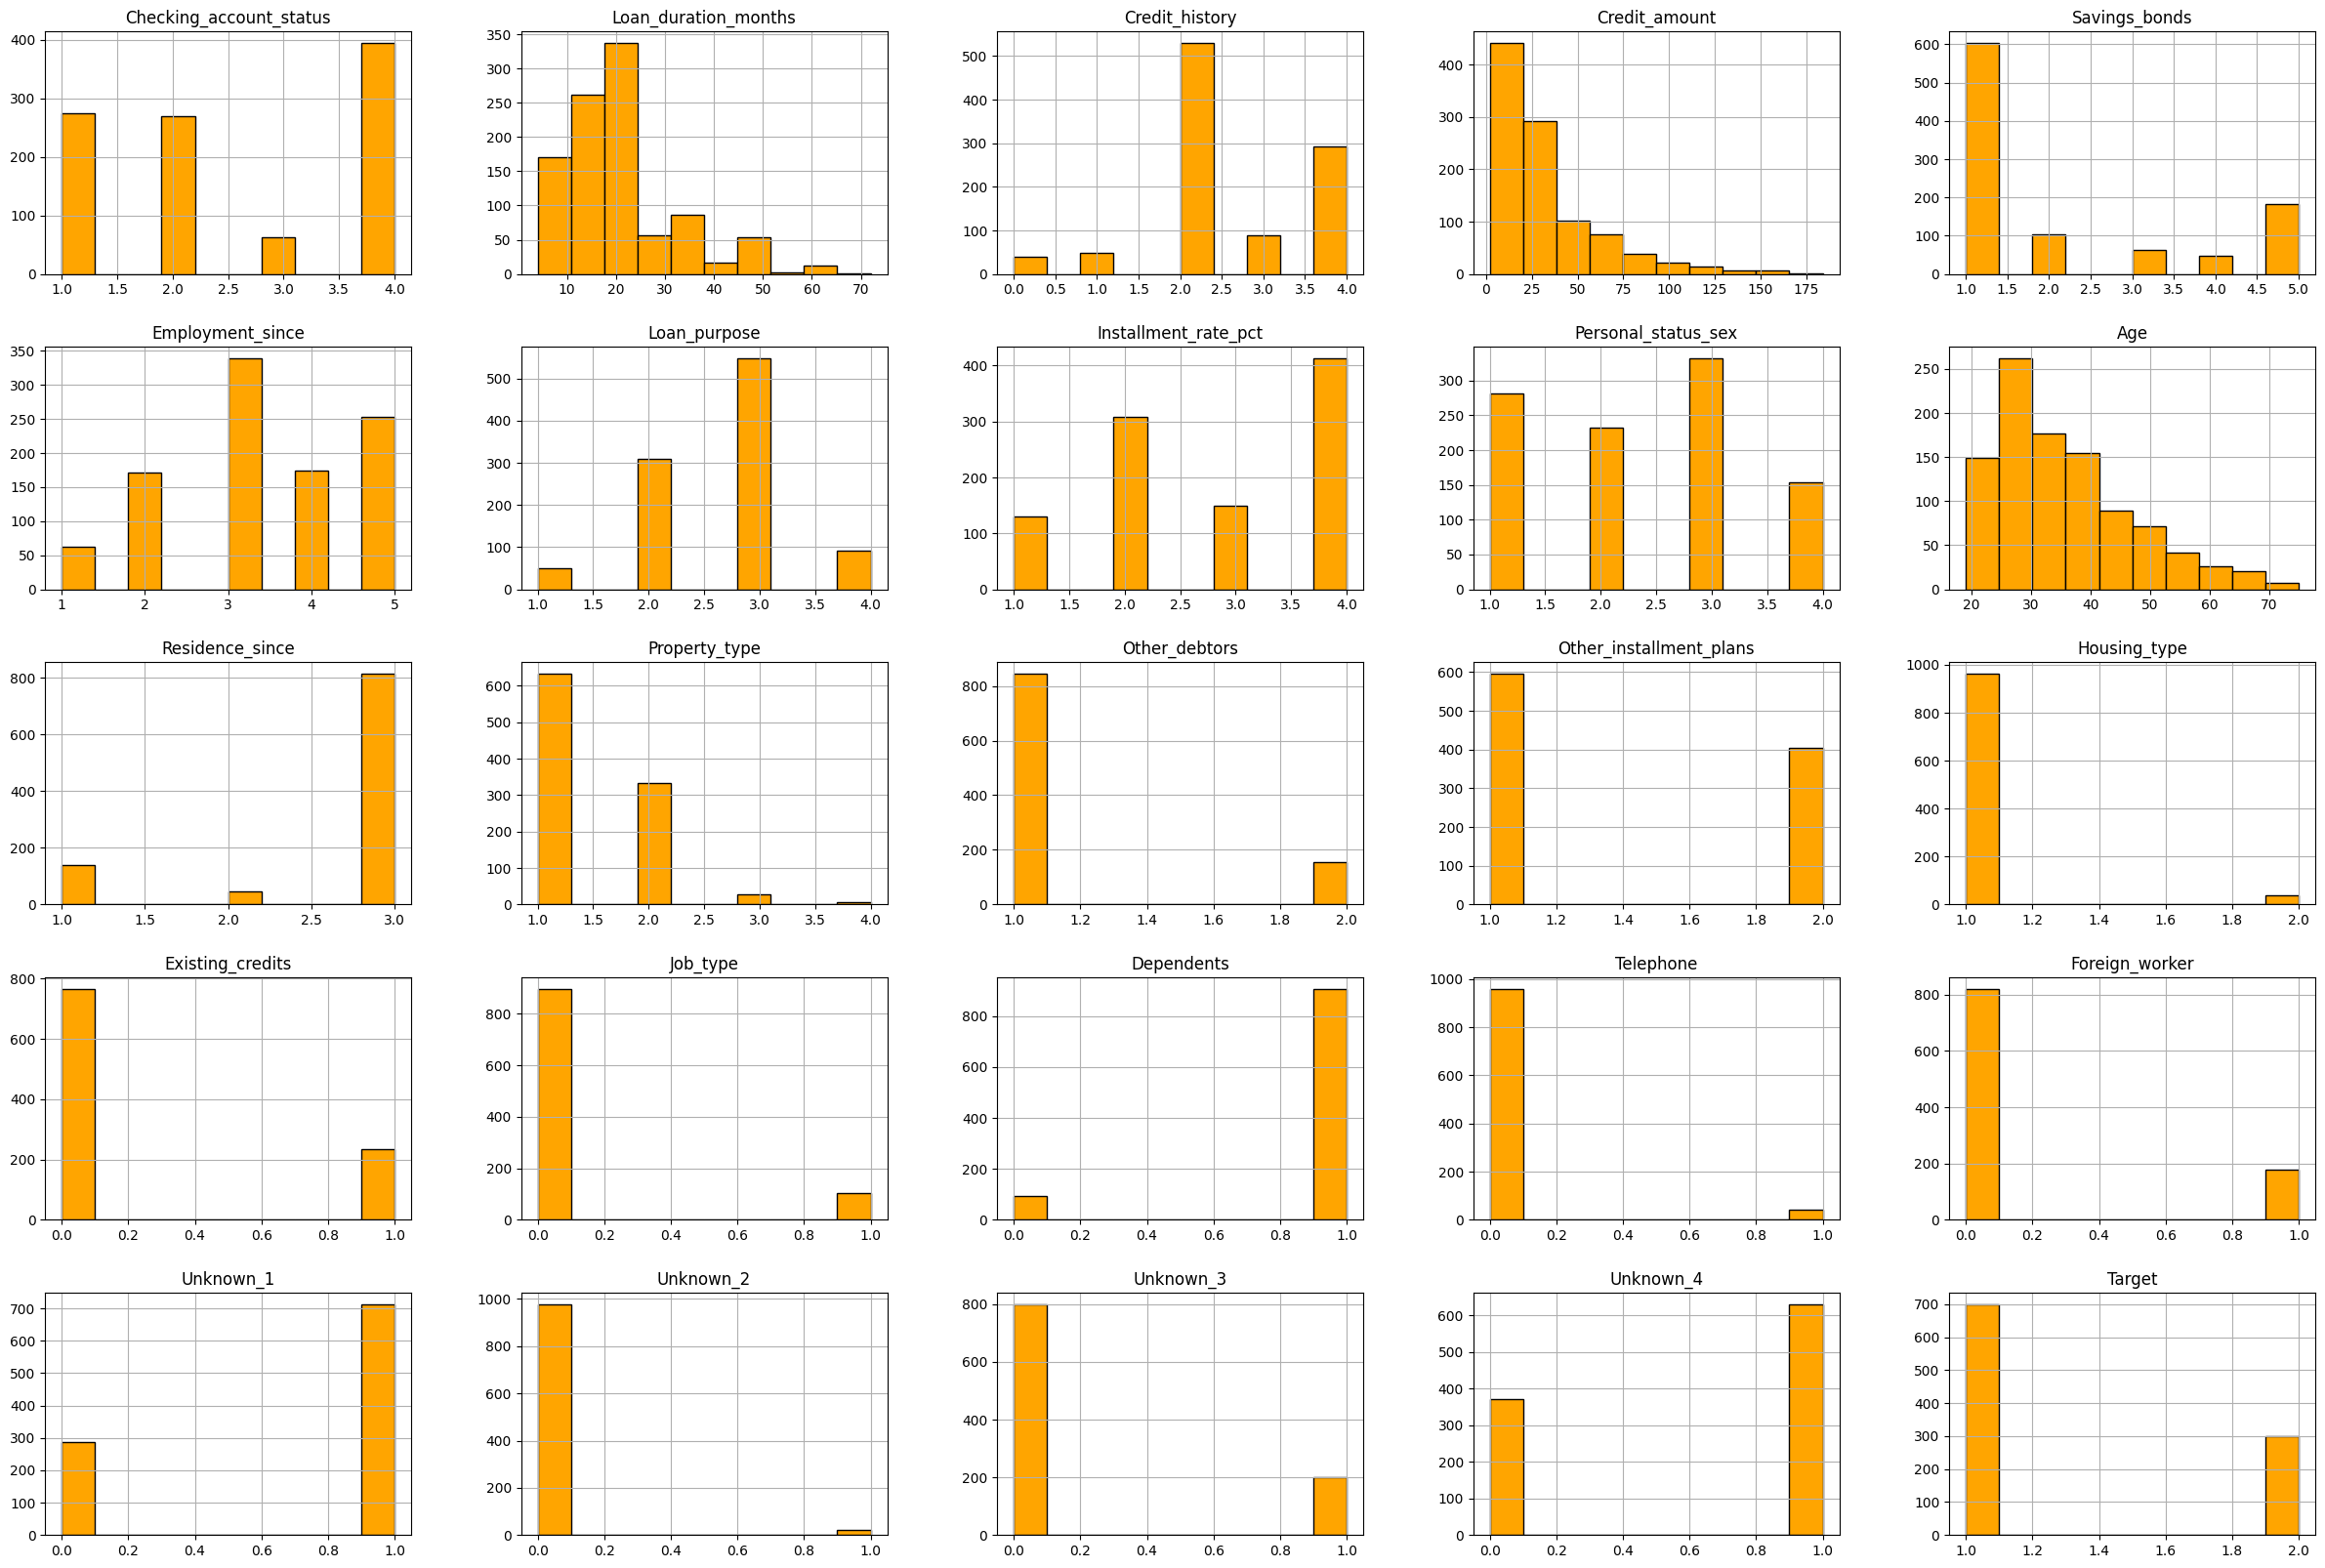

In [27]:
df.hist(figsize=(30,20),bins=10,edgecolor='black',color='orange')

### Idetifying possible outliers


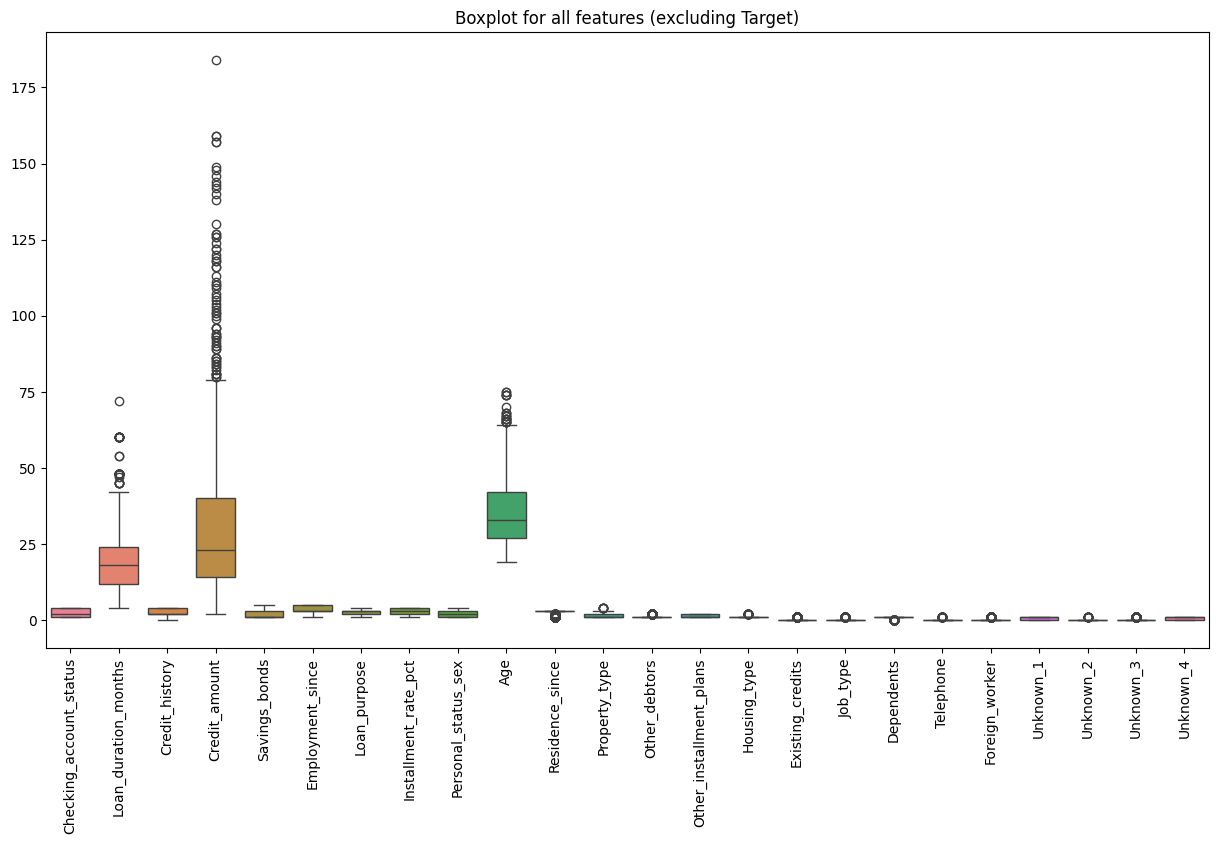

In [28]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns='Target'))
plt.xticks(rotation=90)
plt.title("Boxplot for all features (excluding Target)")
plt.show()

### Visualizing Density of the Data

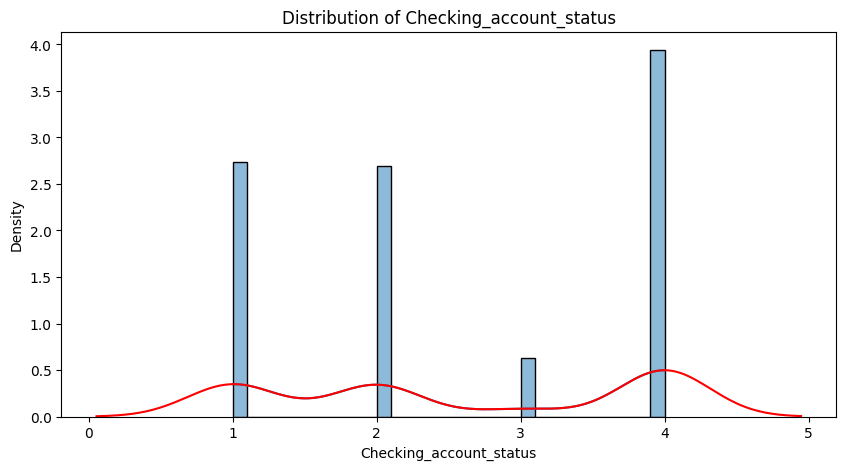

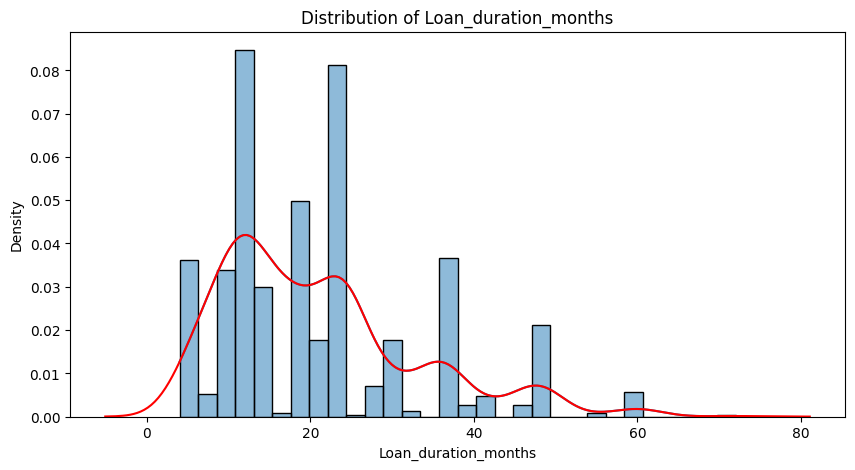

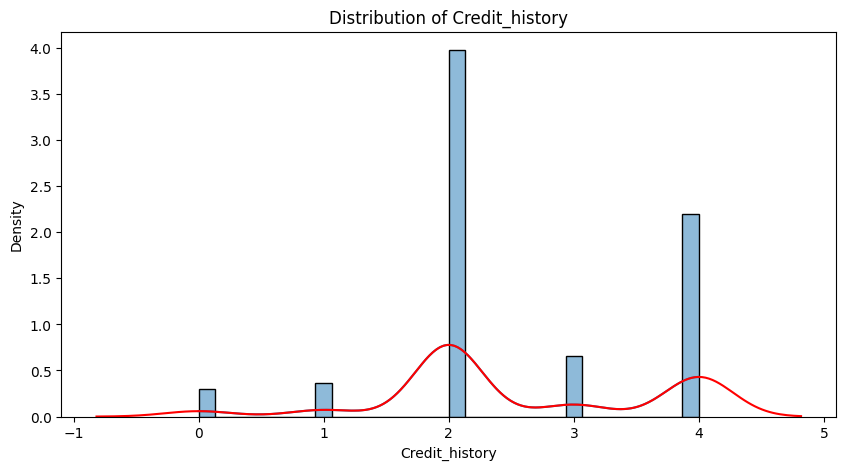

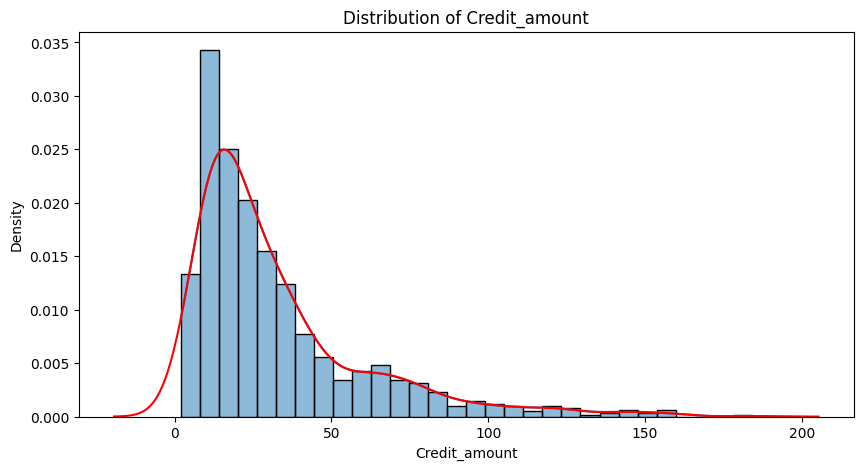

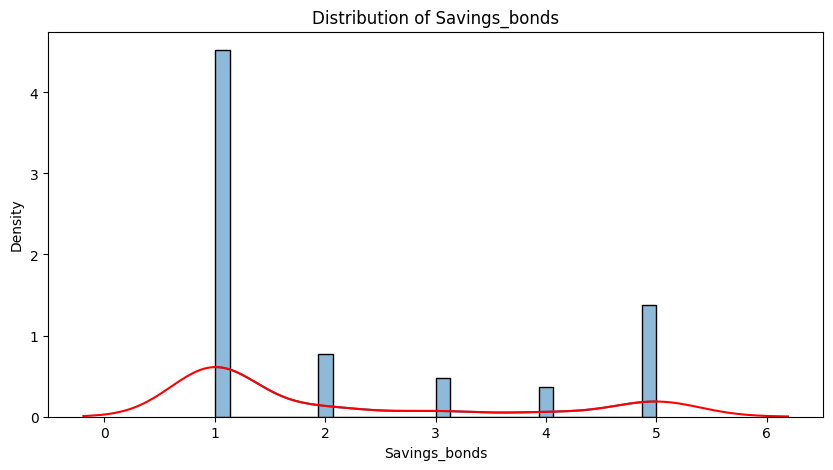

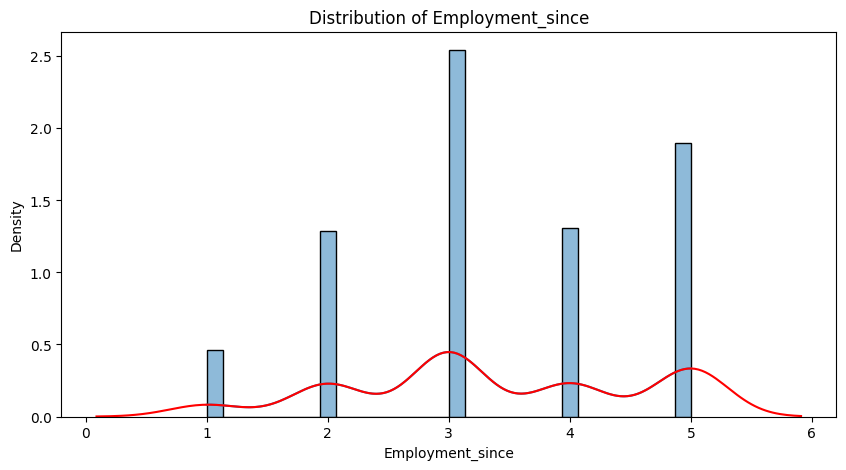

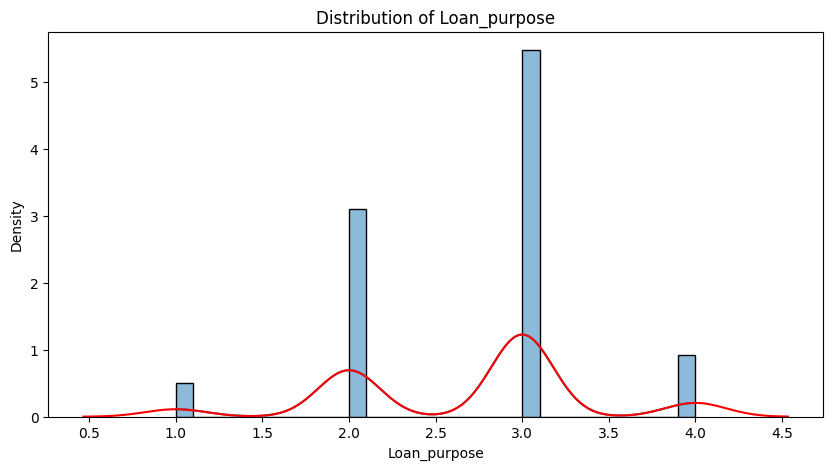

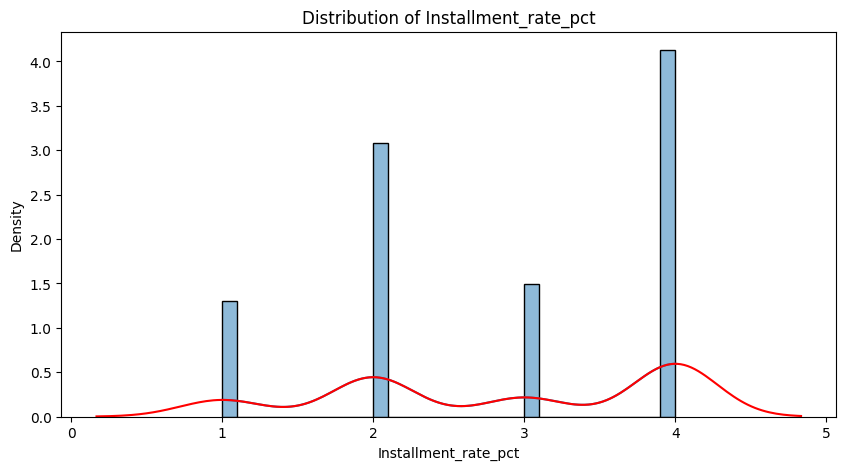

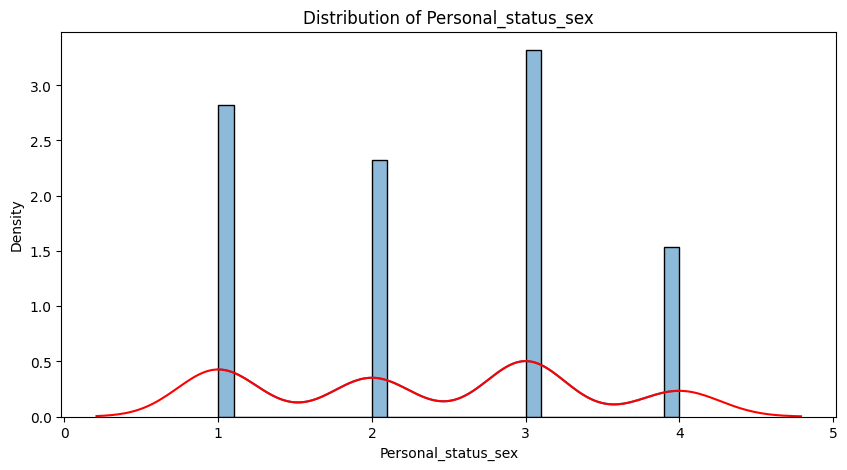

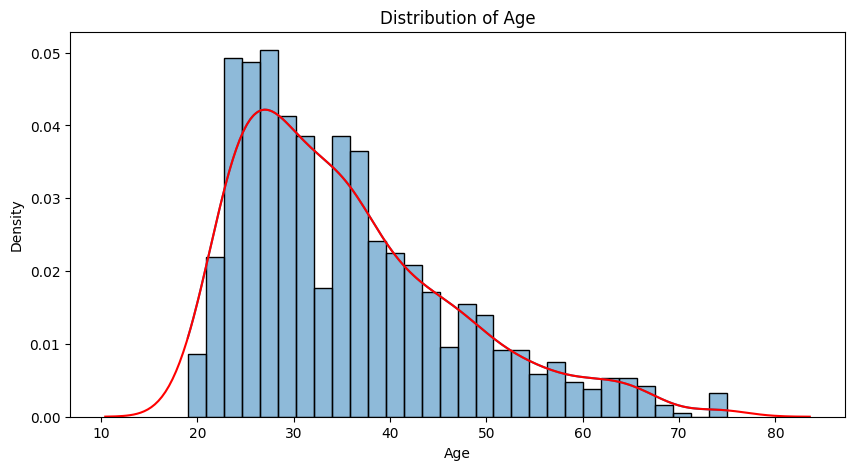

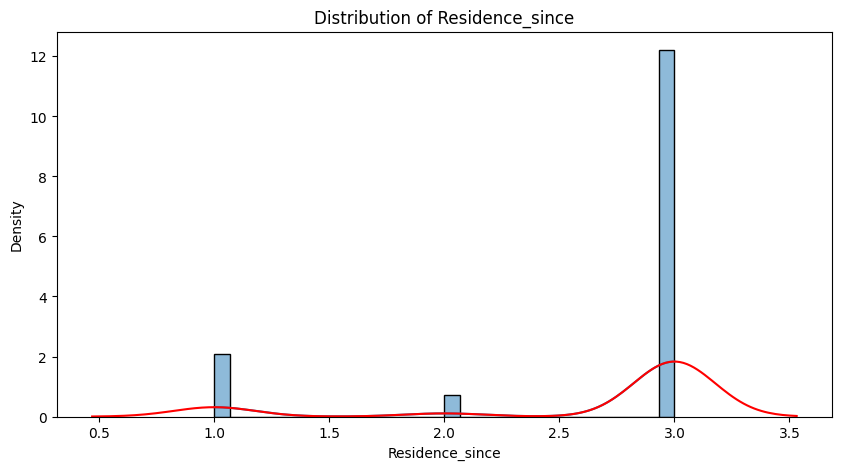

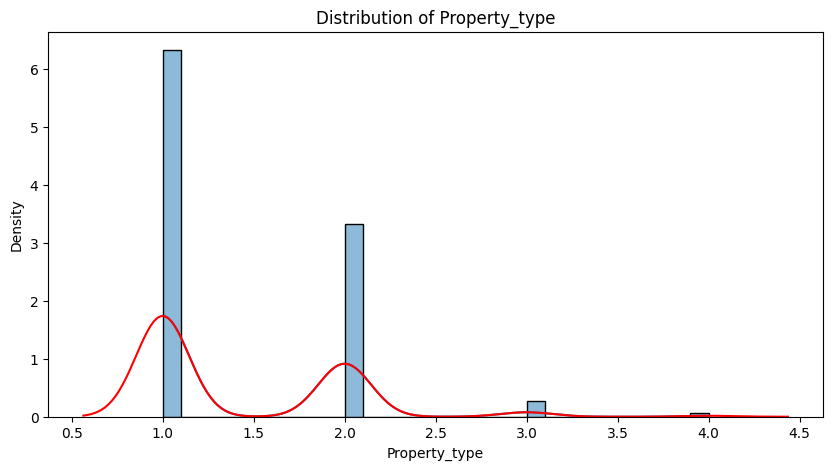

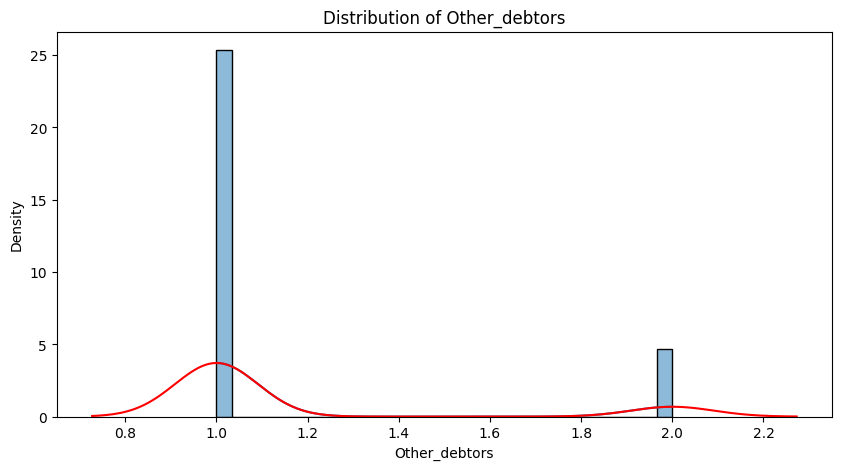

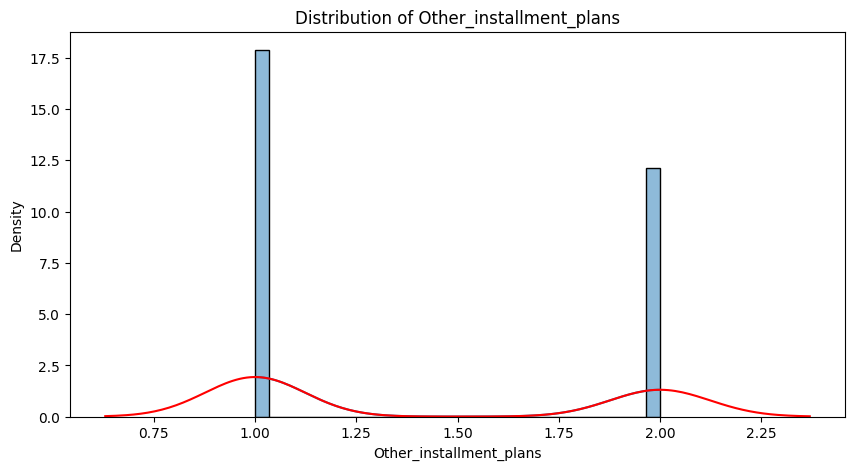

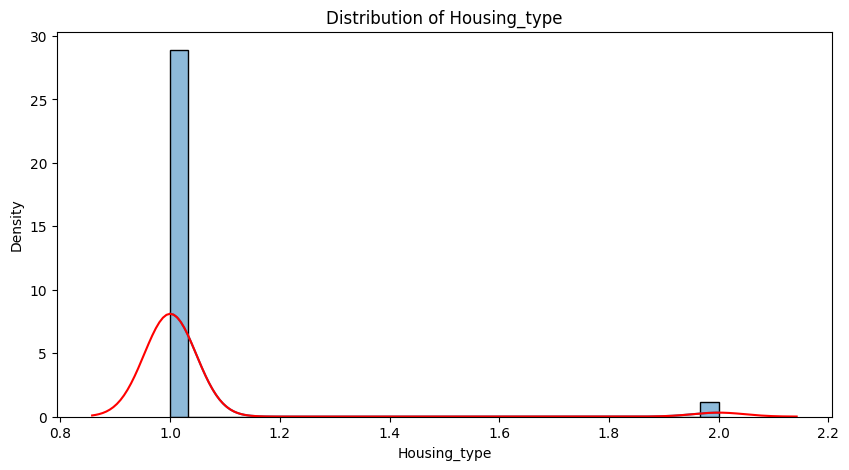

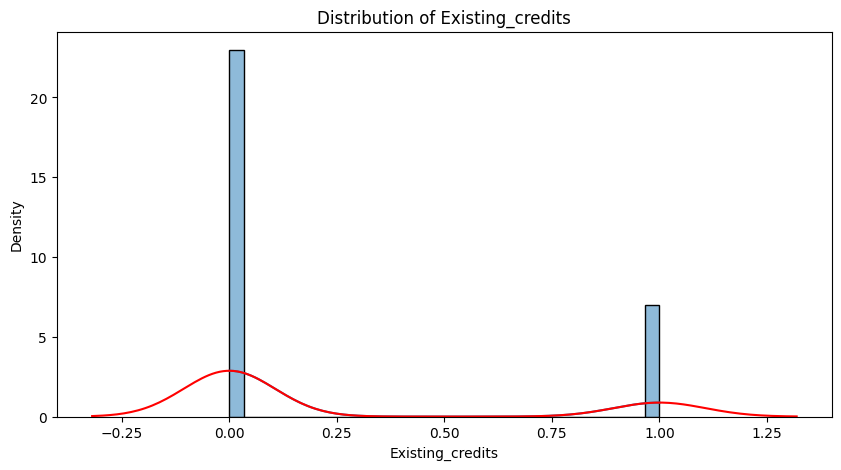

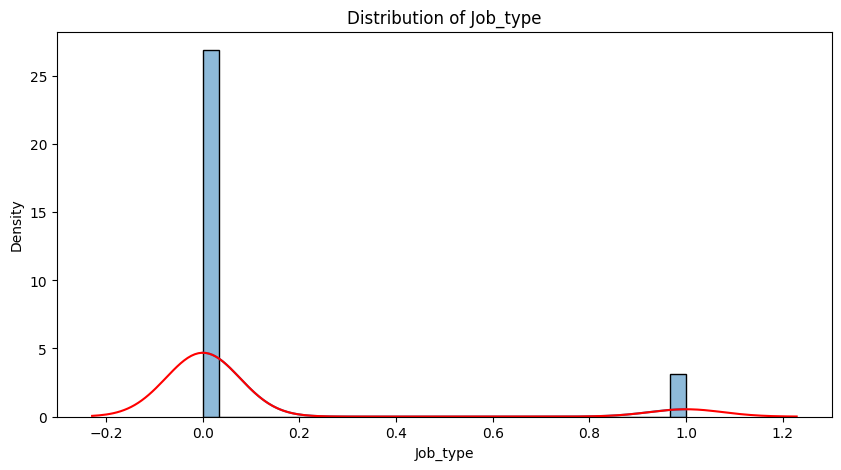

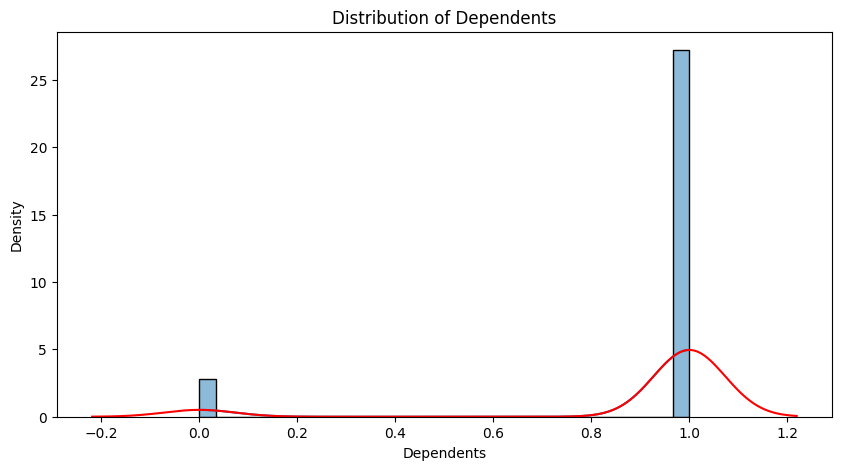

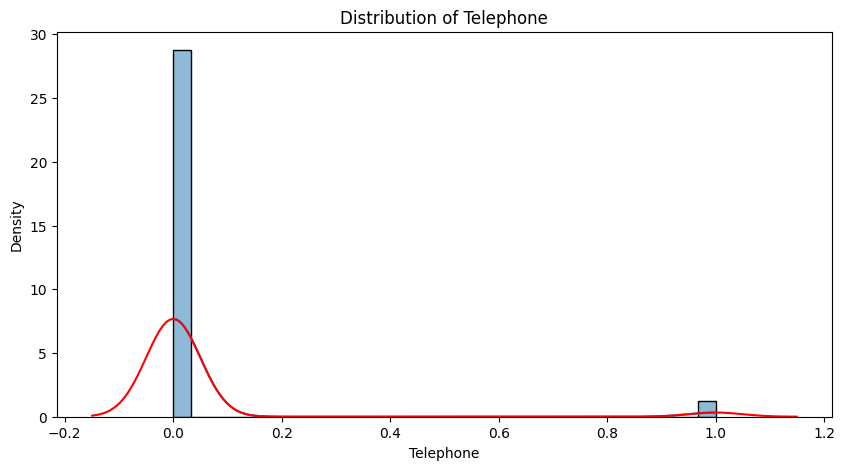

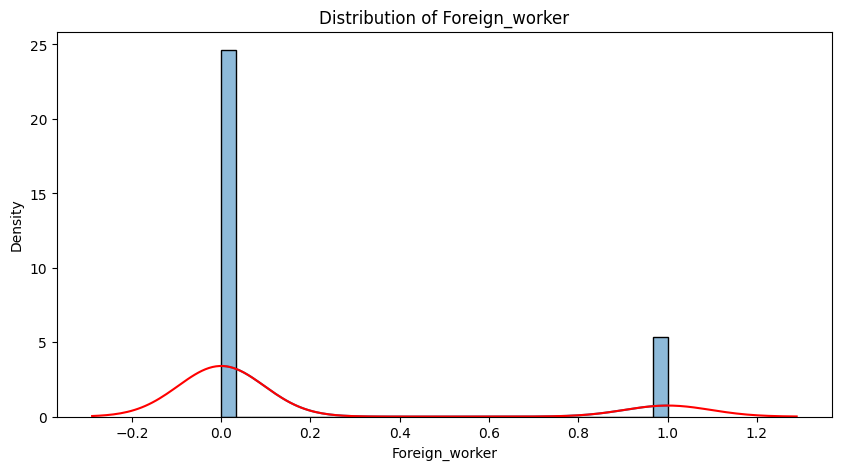

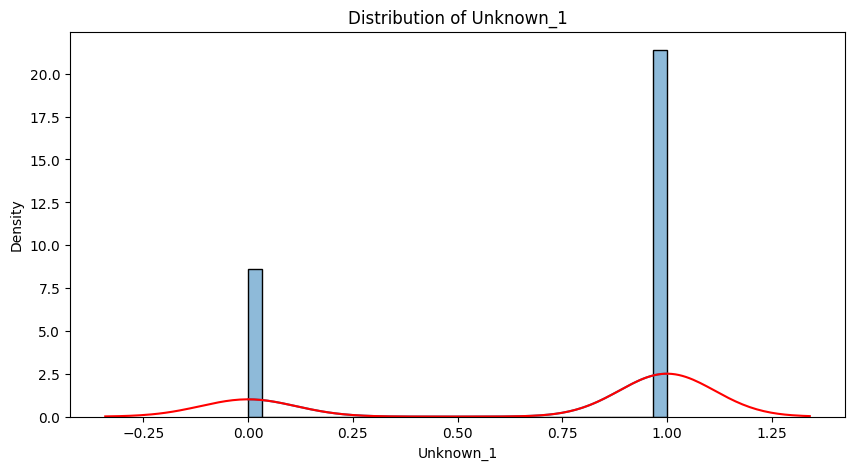

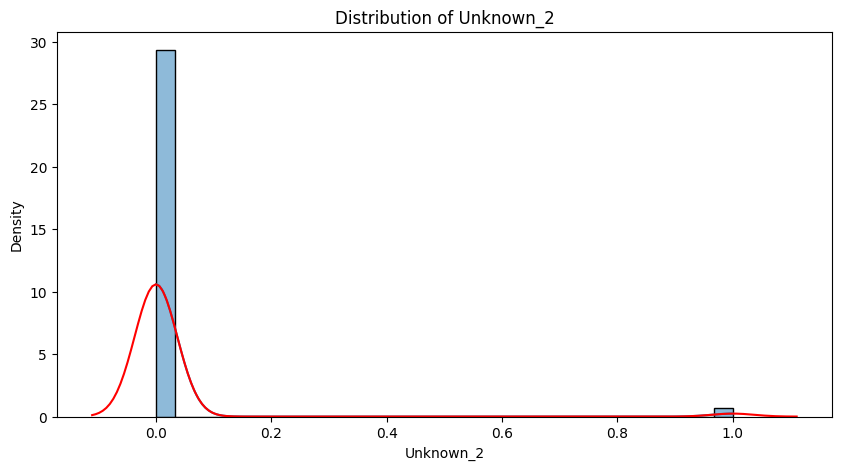

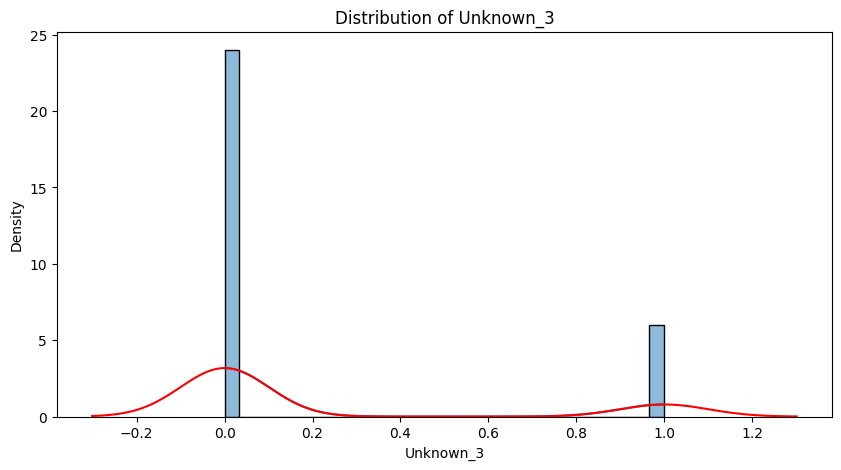

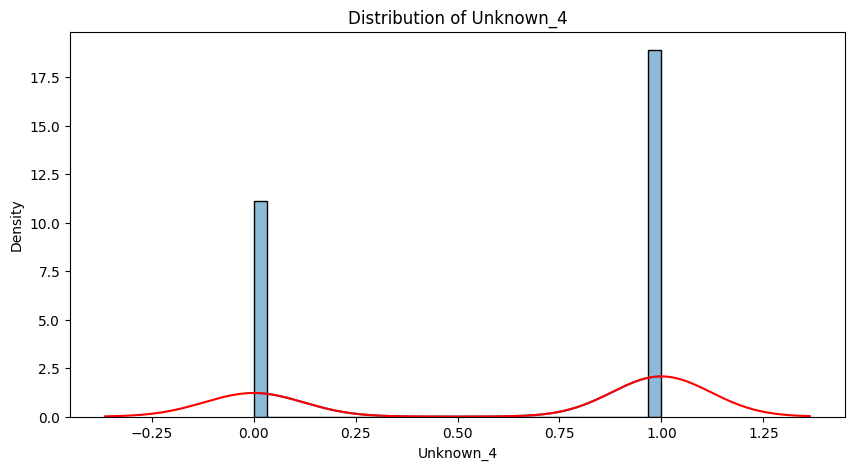

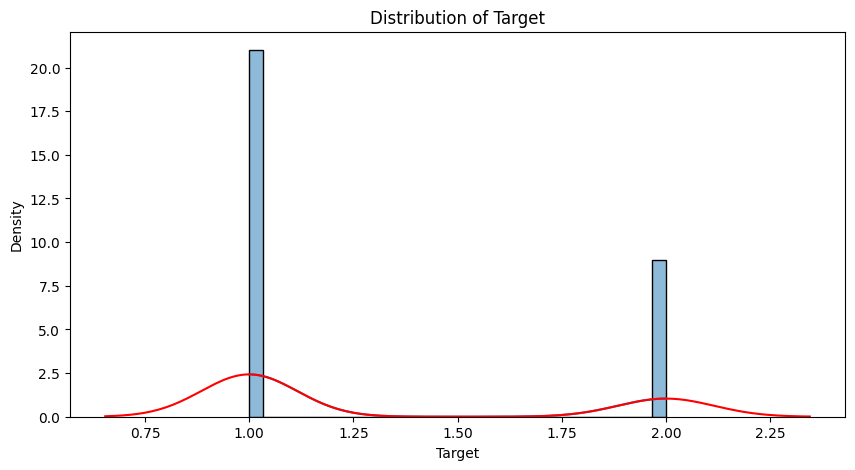

In [29]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], bins=30, kde=True, stat='density')
    sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(f'density_{col}_plot.png')
    plt.show()

# Visualizing Data in Facets (***Visualization tool for Machine Learning***)

In [40]:
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'german_data', 'table': df}])

# Converting to Base64 string for HTML embedding
protostr = b64encode(proto.SerializeToString()).decode("utf-8")

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)

display(HTML(html))

In [52]:
SAMPLE_SIZE = 1000 #@param

df_dive = df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=df_dive)
display(HTML(html))

In [50]:
feature = 'Age' #@param ["", 'Checking_account_status', 'Loan_duration_months', 'Credit_history',      'Credit_amount', 'Savings_bonds', 'Employment_since', 'Loan_purpose','Installment_rate_pct', 'Personal_status_sex', 'Age', 'Residence_since', 'Property_type', 'Other_debtors', 'Other_installment_plans','Housing_type', 'Existing_credits', 'Job_type', 'Dependents', 'Telephone', 'Foreign_worker'] {allow-input: false}

if feature == "Checking_account_status":
  print(
'''Lorem ipsum............''')

if feature == "Loan_duration_months":
  print(
"""'Lorem ipsum............""")

if feature == "Credit_history":
  print(
"""Lorem ipsum.............""")

if feature == "Credit_amount":
  print(
'''Lorem ipsum.............''')

if feature == "Savings_bonds":
  print(
'''Lorem ipsum............''')

if feature == "Employment_since":
  print(
"""'Lorem ipsum............""")

if feature == "Loan_purpose":
  print(
"""Lorem ipsum............""")

if feature == "Installment_rate_pct":
  print(
"""Lorem ipsum.............""")

if feature == "Personal_status_sex":
  print(
"""Lorem ipsum............""")

if feature == "Age":
  print(
"""Tendency to BIAS in age. Credit score tends to be high in individuals that have had more time to build finacial history, while younger age impacts with a significant risk""")

if feature == "Residence_since":
  print(
"""Lorem ipsum.............""")

if feature == "Property_type":
  print(
"""Lorem ipsum............""")

if feature == "Other_debtors":
  print(
'''Lorem ipsum.............''')

if feature == "Other_installment_plans":
  print(
"""Lorem ipsum.............""")

if feature == "Housing_type":
  print(
"""Lorem ipsum............""")

if feature == "Existing_credits":
  print(
'''Lorem ipsum.............''')

if feature == "Job_type":
  print(
'''Lorem ipsum............''')

if feature == "Dependents":
  print(
"""'Lorem ipsum............""")

if feature == "Telephone":
  print(
"""Lorem ipsum.............""")

if feature == "Foreign_worker":
  print(
"""Lorem ipsum............""")

Tendency to BIAS in age. Credit score tends to be high in individuals that have had more time to build finacial history, while younger age impacts with a significant risk


# **PREPROCESSING**
***Scaling the features to create the DEEP NEURAL NETWORK***

In [179]:
y = df["Target"] - 1  # Making it 0/1 (0=Good/1=Bad)
X = df.drop("Target", axis=1)

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# **Initialize training**
***Training 80% Testing 20%***

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)


## Selecting the features of importance

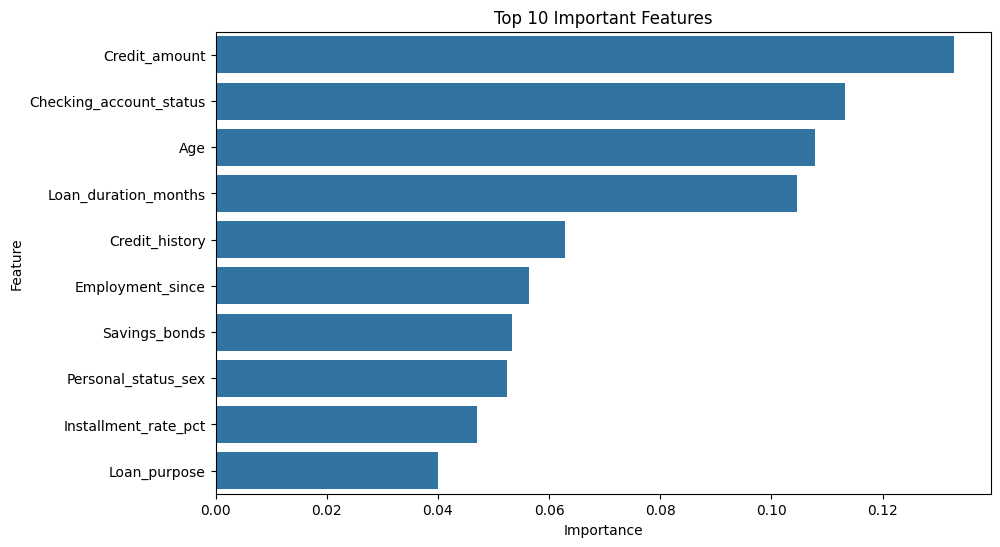

                   Feature  Importance
3            Credit_amount         0.1
0  Checking_account_status         0.1
9                      Age         0.1
1     Loan_duration_months         0.1
2           Credit_history         0.1
5         Employment_since         0.1
4            Savings_bonds         0.1
8      Personal_status_sex         0.1
7     Installment_rate_pct         0.0
6             Loan_purpose         0.0


In [181]:
rf = RandomForestClassifier(random_state=100)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
features = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()
print(feat_importance_df.head(10))

# **Deep Neural Network Training**

In [182]:
# Defining model
model = Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping])


Epoch 1/30
20/20 [==============================] - 1s 23ms/step - loss: 0.7188 - accuracy: 0.4641 - precision_7: 0.2359 - recall_7: 0.3472 - auc_7: 0.4371 - val_loss: 0.6723 - val_accuracy: 0.6500 - val_precision_7: 0.2222 - val_recall_7: 0.0392 - val_auc_7: 0.3681
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.6891 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - auc_7: 0.5298 - val_loss: 0.6443 - val_accuracy: 0.6812 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_auc_7: 0.4110
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6020 - accuracy: 0.6984 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - auc_7: 0.5979 - val_loss: 0.6382 - val_accuracy: 0.6812 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_auc_7: 0.4727
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.6984 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - auc_7: 0.6605 - val_

### **MODEL EVALUATION**

In [183]:
#Fine_Tuning
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
20/20 [==============================] - 0s 14ms/step - loss: 0.4353 - accuracy: 0.8094 - precision_7: 0.7320 - recall_7: 0.5803 - auc_7: 0.8468 - val_loss: 0.4684 - val_accuracy: 0.7625 - val_precision_7: 0.6512 - val_recall_7: 0.5490 - val_auc_7: 0.8232
Epoch 2/30
20/20 [==============================] - 0s 6ms/step - loss: 0.4345 - accuracy: 0.8094 - precision_7: 0.7320 - recall_7: 0.5803 - auc_7: 0.8472 - val_loss: 0.4757 - val_accuracy: 0.7625 - val_precision_7: 0.6757 - val_recall_7: 0.4902 - val_auc_7: 0.8204
Epoch 3/30
20/20 [==============================] - 0s 7ms/step - loss: 0.4340 - accuracy: 0.8078 - precision_7: 0.7431 - recall_7: 0.5544 - auc_7: 0.8466 - val_loss: 0.4717 - val_accuracy: 0.7625 - val_precision_7: 0.6444 - val_recall_7: 0.5686 - val_auc_7: 0.8219
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.8109 - precision_7: 0.7466 - recall_7: 0.5648 - auc_7: 0.8531 - val_loss: 0.4729 - val_accuracy: 0.7625 - va

In [184]:
final_epoch = len(history.history['loss']) - 1

print("Training Metrics:")
print(f"Loss: {history.history['loss'][final_epoch]:.4f}")
print(f"Accuracy: {history.history['accuracy'][final_epoch]:.4f}")
print(f"Precision: {history.history['precision_7'][final_epoch]:.4f}")
print(f"Recall: {history.history['recall_7'][final_epoch]:.4f}")
print(f"AUC: {history.history['auc_7'][final_epoch]:.4f}")

print("\nValidation Metrics:")
print(f"Val Loss: {history.history['val_loss'][final_epoch]:.4f}")
print(f"Val Accuracy: {history.history['val_accuracy'][final_epoch]:.4f}")
print(f"Val Precision: {history.history['val_precision_7'][final_epoch]:.4f}")
print(f"Val Recall: {history.history['val_recall_7'][final_epoch]:.4f}")
print(f"Val AUC: {history.history['val_auc_7'][final_epoch]:.4f}")


Training Metrics:
Loss: 0.4277
Accuracy: 0.8109
Precision: 0.7466
Recall: 0.5648
AUC: 0.8531

Validation Metrics:
Val Loss: 0.4729
Val Accuracy: 0.7625
Val Precision: 0.6512
Val Recall: 0.5490
Val AUC: 0.8207


7/7 [==============================] - 0s 2ms/step


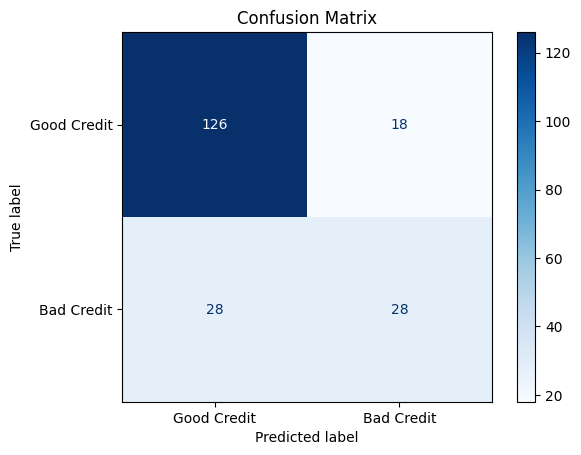

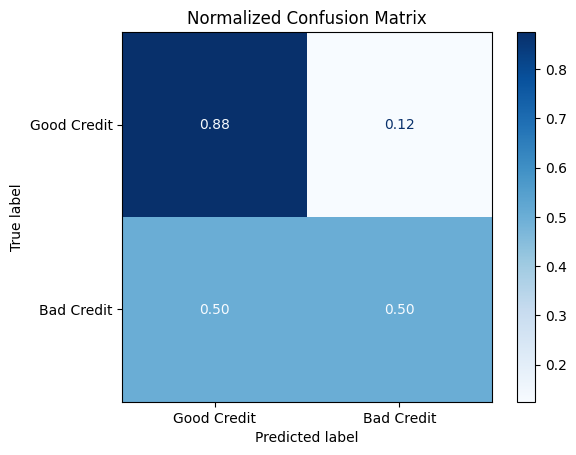

Classification Report:
              precision    recall  f1-score   support

 Good Credit       0.82      0.88      0.85       144
  Bad Credit       0.61      0.50      0.55        56

    accuracy                           0.77       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

Confusion Matrix
[[126  18]
 [ 28  28]]
Normalized Confusion Matrix
[[0.875 0.125]
 [0.5   0.5  ]]


In [189]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good Credit", "Bad Credit"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=["Good Credit", "Bad Credit"])
disp_norm.plot(cmap="Blues", values_format=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Good Credit", "Bad Credit"]))
print("Confusion Matrix")
print(cm)
print("Normalized Confusion Matrix")
print(cm_normalized)


### Define Function to Visualize Binary Confusion Matrix

In [190]:
def plot_confusion_matrix(y_true, y_pred_binary, class_names, subgroup, normalize=False, figsize=(8,6)):

    cm = confusion_matrix(y_true, y_pred_binary, normalize='true' if normalize else None)

    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

    rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Liberation Sans'],
    })
    sns.set_context("notebook", font_scale=1.25)

    fig = plt.figure(figsize=figsize)
    plt.title(f'Confusion Matrix for Performance Across {subgroup}')

    # Labels (True Positive etc.)
    strings = np.asarray([['True Positives', 'False Negatives'],
                          ['False Positives', 'True Negatives']])
    labels = (np.asarray([
        f"{value:.2f}\n{label}" if normalize else f"{int(value)}\n{label}"
        for label, value in zip(strings.flatten(), cm.flatten())
    ])).reshape(2, 2)

    heatmap = sns.heatmap(df_cm, annot=labels, fmt="", linewidths=2.0, cmap="GnBu")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    return fig


7/7 [==============================] - 0s 2ms/step


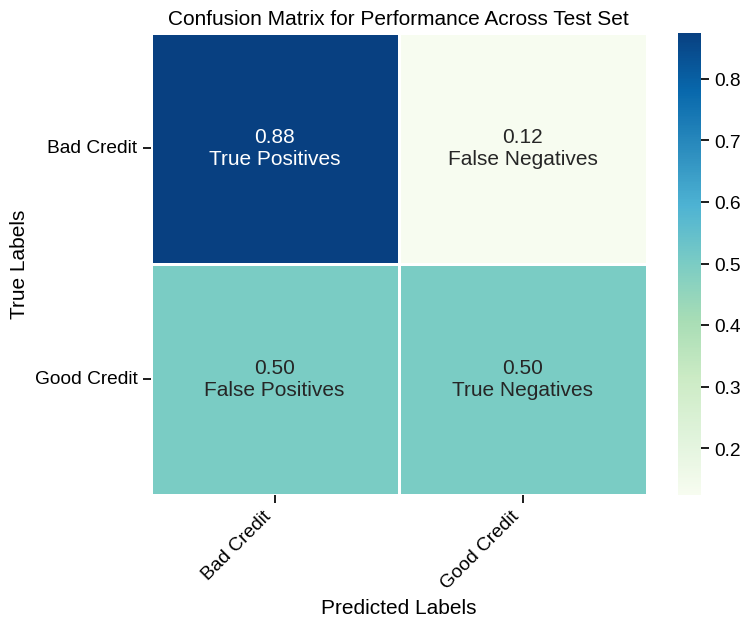

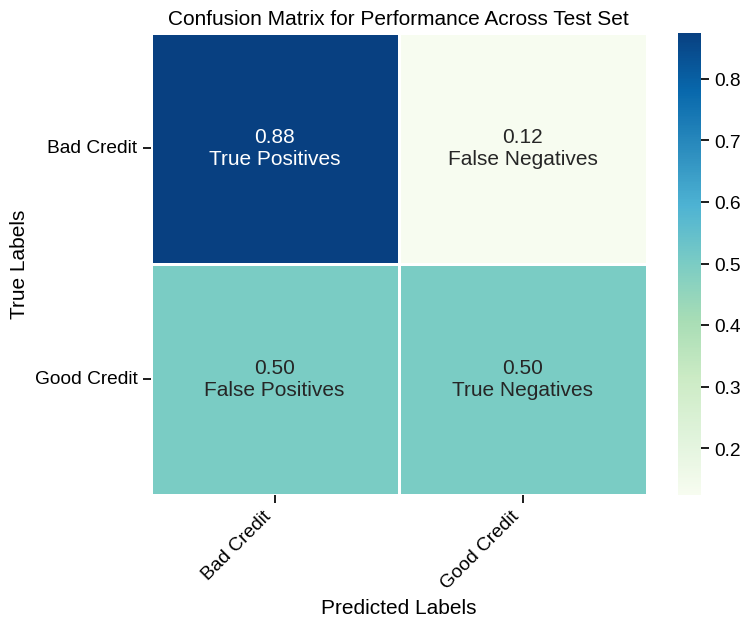

In [191]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

class_names = ['Bad Credit', 'Good Credit']
subgroup = "Test Set"

plot_confusion_matrix(y_test, y_pred_binary, class_names, subgroup, normalize=True) #(normalized)


# Analyzing BIAS in results

In [192]:
# Defining age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Under 30', '30-50', 'Over 50'])

print(df[['Age', 'AgeGroup']].head())


   Age  AgeGroup
0   67   Over 50
1   22  Under 30
2   49     30-50
3   45     30-50
4   53   Over 50


In [193]:
# Test DataFrame including AgeGroup
test_df = X_test.copy()
test_df["Target"] = y_test
test_df["AgeGroup"] = df.loc[test_df.index, "AgeGroup"]


1/1 [==============================] - 0s 39ms/step


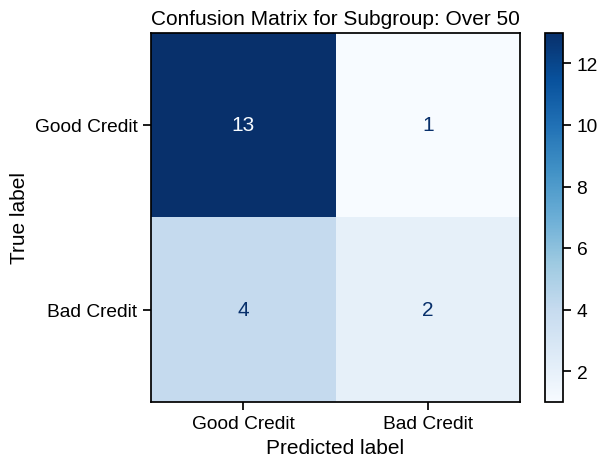

              precision    recall  f1-score   support

 Good Credit       0.76      0.93      0.84        14
  Bad Credit       0.67      0.33      0.44         6

    accuracy                           0.75        20
   macro avg       0.72      0.63      0.64        20
weighted avg       0.74      0.75      0.72        20

Confusion Matrix
[[13  1]
 [ 4  2]]


In [200]:
#@title Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup
CATEGORY = "AgeGroup" #@param {type:"string"}
SUBGROUP = "Over 50" #@param ["Under 30", "30-50", "Over 50"] {type:"string"}

# Filter the test set by subgroup
subgroup_filter = test_df[test_df[CATEGORY] == SUBGROUP]
X_subgroup = subgroup_filter.drop(columns=["Target", "AgeGroup"])
y_subgroup = subgroup_filter["Target"]

# Get predictions and binarize
y_pred_probs = model.predict(X_subgroup)
y_pred_binary = (y_pred_probs > 0.5).astype(int)

# Confusion matrix and metrics
cm = confusion_matrix(y_subgroup, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good Credit", "Bad Credit"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for Subgroup: {SUBGROUP}")
plt.show()

print(classification_report(y_subgroup, y_pred_binary, target_names=["Good Credit", "Bad Credit"]))
print("Confusion Matrix")
print(cm)


**RESULTS IN GROUPS UNDER AGE 30:**

44 true positives (Good credit correctly identified)

15 true negatives (Bad credit correctly identified)

8 false negatives (Good credit predicted as Bad)

13 false positives (Bad credit predicted as Good)

**RESULTS IN GROUPS 30-50 YEARS OLD:**

69 true positives: (Good credit correctly identified)

11 true negatives: (Bad credit correctly identified)

9 false negatives: (Good credit predicted as bad)

11 false positives: (Bad credit predicted as good)

**RESULTS IN GROUPS OVER AGE 50:**

13 true Positives: (Good Credit correctly identified)

2 true Negatives: (Bad Credit correctly identified)

4 false Positives: (Bad Credit predicted as Good)

1 false Negatives: (Good Credit predicted as Bad)


#Conclusion
***Based on the current results, the dataset suggest a potential bias on groups with ages over 50 who are predicted with good credit. Therefore, features correlated to age may influence the predictions unfairly.***

-

#NEURAL NETWORK 2

### Evaluating another Deep Neural Network with significant features

In [138]:
deep_columns = [
    tf.feature_column.numeric_column("Credit_amount"),
    tf.feature_column.numeric_column("Checking_account_status"),
    tf.feature_column.numeric_column("Age"),
    tf.feature_column.numeric_column("Loan_duration_months"),
    tf.feature_column.numeric_column("Credit_history"),
    tf.feature_column.numeric_column("Employment_since"),
    tf.feature_column.numeric_column("Savings_bonds"),
    tf.feature_column.numeric_column("Personal_status_sex"),
    tf.feature_column.numeric_column("Installment_rate_pct"),
    tf.feature_column.numeric_column("Loan_purpose")
]

*Fine-Tuning*

In [143]:
# Parameters from form fill-ins
HIDDEN_UNITS_LAYER_01 = 64 #@param
HIDDEN_UNITS_LAYER_02 = 32 #@param
LEARNING_RATE = 0.0001 #@param
L1_REGULARIZATION_STRENGTH = 0.001 #@param
L2_REGULARIZATION_STRENGTH = 0.001 #@param

RANDOM_SEED = 512
tf.random.set_seed(RANDOM_SEED)


# Definining regularizer
regularizer = tf.keras.regularizers.l1_l2(
    l1=L1_REGULARIZATION_STRENGTH,
    l2=L2_REGULARIZATION_STRENGTH
    )

# List of built-in metrics that we'll need to evaluate performance.
METRICS = [
  tf.keras.metrics.TruePositives(name='tp'),
  tf.keras.metrics.FalsePositives(name='fp'),
  tf.keras.metrics.TrueNegatives(name='tn'),
  tf.keras.metrics.FalseNegatives(name='fn'),
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.AUC(name='auc'),
]

#Comptuting Class Weights to handle imbalance.
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Model using the deep_columns
model = tf.keras.Sequential([
  layers.DenseFeatures(deep_columns),
  layers.Dense(
      HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      1, activation='sigmoid', kernel_regularizer=regularizer)
])

# Compile with optimizer, loss, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


#### **Significant variables, and adding "Age" for a subgroup**

In [158]:
variables = [
   "Credit_amount",
   "Checking_account_status",
   "Loan_duration_months",
   "Credit_history",
   "Employment_since",
   "Savings_bonds",
   "Personal_status_sex",
   "Installment_rate_pct",
   "Loan_purpose"
  ]


subgroup_variables = ["Age"]

feature_columns = variables + subgroup_variables

print (feature_columns)

['Credit_amount', 'Checking_account_status', 'Loan_duration_months', 'Credit_history', 'Employment_since', 'Savings_bonds', 'Personal_status_sex', 'Installment_rate_pct', 'Loan_purpose', 'Age']


In [151]:
print(df.columns)

Index(['Checking_account_status', 'Loan_duration_months', 'Credit_history',
       'Credit_amount', 'Savings_bonds', 'Employment_since', 'Loan_purpose',
       'Installment_rate_pct', 'Personal_status_sex', 'Age', 'Residence_since',
       'Property_type', 'Other_debtors', 'Other_installment_plans',
       'Housing_type', 'Existing_credits', 'Job_type', 'Dependents',
       'Telephone', 'Foreign_worker', 'Unknown_1', 'Unknown_2', 'Unknown_3',
       'Unknown_4', 'Target'],
      dtype='object')


**Dictionary for columns to Neural Network Layer**

In [159]:
feature_dict = {column: X[column] for column in feature_columns}

***Neural Network Model Fitting to Dataset***

In [160]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS,
              run_eagerly=True)

### **Weights Class Adjustment**

In [161]:
model = tf.keras.Sequential([
    layers.Dense(
        HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
    layers.Dense(
        HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
    layers.Dense(
        1, activation='sigmoid', kernel_regularizer=regularizer)
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)


In [162]:
class_weight_dict = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary
class_weight_dict = dict(zip(np.unique(y_train), class_weight_dict))


7/7 [==============================] - 0s 2ms/step
[[ 11 133]
 [  3  53]]
              precision    recall  f1-score   support

           0       0.79      0.08      0.14       144
           1       0.28      0.95      0.44        56

    accuracy                           0.32       200
   macro avg       0.54      0.51      0.29       200
weighted avg       0.65      0.32      0.22       200



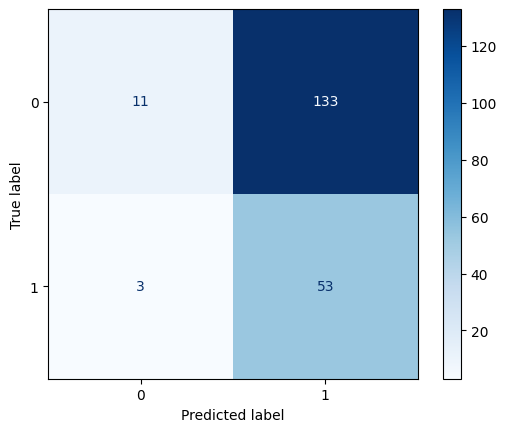

In [163]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()  # flatten if needed

print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

### **Normalized confusion Matrix**

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c929e1bc2d0>>


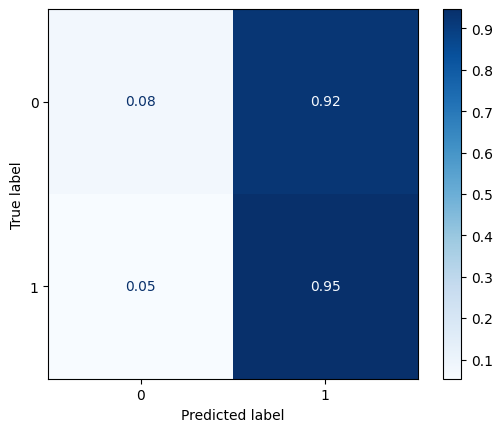

In [166]:
cm = confusion_matrix(y_test, y_pred_binary, normalize='true')  # 'true' means row-wise (per class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format=".2f")
print(disp.plot)